## i) Import packages & Read data

In [1]:
import pandas as pd 
import string, re
import numpy as np
import nltk
from sklearn.cross_validation import train_test_split
from sklearn import naive_bayes,metrics, linear_model,svm, grid_search
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Perceptron

from sklearn.multiclass import OneVsRestClassifier
import sklearn.utils

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import style
plt.style.use('ggplot')

In [2]:
results_sep_wneutr = pd.read_csv("end_results_awoe.csv", sep=";", decimal=",")
results_sep = results_sep_wneutr[results_sep_wneutr['CORRECT TWEET']!=0]

categories = results_sep.hand_labels_tog.unique()
categories  = categories.tolist()
results_sep

,id,text_sentiment,text_score,text_highest_score,text_confidence_positive,text_confidence_negative,bild_sentiment,bild_score,bild_highest_score,CORRECT TWEET,hand_labels_text,hand_labels_image,hand_labels_tog,processed_text,text_x
0,0000341####000006095.jpg,1,0.988599,0.988599,0.988599,0.011401,-1,-0.941433,0.941433,-1,1.0,1.0,-1.0,another thanks lifetime right side history has...,Another $27 bucks! Thanks for a lifetime of be...
1,0000548####000006211.jpg,1,0.984217,0.984217,0.984217,0.015783,1,0.797248,0.797248,1,1.0,1.0,1.0,thank hashtagfeelthebern hashtaghillaryclinton...,thank you @RobertKennedyJr ! #FeelTheBern #Hil...
2,0000637####000005720.jpg,1,0.982546,0.982546,0.982546,0.017454,1,0.553803,0.553803,1,1.0,1.0,1.0,hashtagcaprimary hashtaglosangeles hashtagsand...,#CAprimary #LosAngeles #SanDiego #SanFransisco...
3,0000031####000009239.jpg,1,0.974512,0.974512,0.974512,0.025488,-1,-0.896557,0.896557,1,1.0,1.0,1.0,hashtagberniesanders positive positive hashtag...,#BernieSanders #bernieorbust #stillsanders #fe...
4,0000566####000008099.jpg,1,0.973544,0.973544,0.973544,0.026456,1,0.503893,0.503893,-1,-1.0,-1.0,-1.0,hillary press conference question hashtagcapri...,"Hillary no press conferences in 2016,avoids qu..."
5,0000356####000003332.jpg,1,0.970214,0.970214,0.970214,0.029786,1,0.572995,0.572995,1,1.0,1.0,1.0,thank endorsing far wiser positive hashtagcapr...,@sacbee_news THANK YOU for endorsing @HillaryC...
6,0000386####000002440.jpg,1,0.967963,0.967963,0.967963,0.032037,1,0.590228,0.590228,1,1.0,1.0,1.0,truth set vote hashtagcaprimary,@whiplash_312 @kingnutterrick @katiecouric The...
7,0000587####000001126.jpg,1,0.966998,0.966998,0.966998,0.033002,-1,-0.806857,0.806857,1,1.0,1.0,1.0,best thing hashtagfeelthebern hashtagcaprimary,@BernieSanders The best things... #FeelTheBern...
8,0000407####000000807.jpg,1,0.966838,0.966838,0.966838,0.033162,-1,-0.986904,0.986904,-1,1.0,-1.0,-1.0,hashtagclintoncash positive hashtagbernie hash...,#ClintonCash #AntiWar #Bernie #FeelTheBern #No...
9,0000216####000006021.jpg,1,0.966807,0.966807,0.966807,0.033193,-1,-0.932057,0.932057,-1,-1.0,-1.0,-1.0,hashtagjerrybrown support hashtaghillary way p...,#JerryBrown Support #Hillary ? NO WAY IN HELL!...


# ii) Create train & test split

In [33]:
x = pd.DataFrame(results_sep[['text_score', 'bild_score']])
y = results_sep.hand_labels_tog.values
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2)

# Output to show performance
def benchmark(clf,xtrain,ytrain,xtest,ytest,categories):
    print('* ' * 40)
    print(clf)
    clf.fit(xtrain, ytrain)
    pred = clf.predict(xtest)
    score = metrics.accuracy_score(ytest, pred)
    print("Accuracy:   %0.3f" % score)
    print("Confusion Matrix:\n",confusion_matrix(pred, y_test),"\n")
    print("Classification Report:\n",metrics.classification_report(y_test, pred, target_names=['+1','-1']))

## iii) Train Logistic Regression

In [34]:
# Logistic Regression
# Define different Cs from 100000 to 0.00001, smaller values specify stronger regularization
C =[ float(1)/float((10**exponent)) for exponent in range(-4, 5)]
compare_C = []
logit = 0
# Train and fit classifier for every alpha & print accuracy
print('* ' * 40)
for i in C:
    lm = linear_model.LogisticRegression()
    lm.fit(x_train, y_train)
    y_pred = lm.predict(x_test)
    compare_C.append((i,lm.score(x_test,y_test)))
    print('Logistic Regression on  C = '+str(i)+' : ', 
          round(metrics.accuracy_score(y_test, y_pred),5))


compare_C = sorted(compare_C, key=lambda x: x[1],reverse=True)
C = compare_C[0][0]    
lm= linear_model.LogisticRegression(multi_class='multinomial'\
                                                  ,solver='newton-cg',C=C)



* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Logistic Regression on  C = 10000.0 :  0.85
Logistic Regression on  C = 1000.0 :  0.85
Logistic Regression on  C = 100.0 :  0.85
Logistic Regression on  C = 10.0 :  0.85
Logistic Regression on  C = 1.0 :  0.85
Logistic Regression on  C = 0.1 :  0.85
Logistic Regression on  C = 0.01 :  0.85
Logistic Regression on  C = 0.001 :  0.85
Logistic Regression on  C = 0.0001 :  0.85


In [35]:
benchmark(lm,x_train,y_train,x_test,y_test,categories)

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)
Accuracy:   0.850
Confusion Matrix:
 [[17  2]
 [ 4 17]] 

Classification Report:
              precision    recall  f1-score   support

         +1       0.89      0.81      0.85        21
         -1       0.81      0.89      0.85        19

avg / total       0.85      0.85      0.85        40



In [36]:
lm.fit(x,y)

log_result = pd.DataFrame(lm.coef_, columns=['text_weight', 'image_weight'])
log_result['intercept'] = lm.intercept_
log_result

,text_weight,image_weight,intercept
0,0.674585,0.412596,-0.123545


In [37]:
results_sep_wneutr = results_sep_wneutr[np.isfinite(results_sep_wneutr['text_score'])]#results_sep_wneutr.dropna()
x_wholeset = pd.DataFrame(results_sep_wneutr[['text_score', 'bild_score']])

results_sep_wneutr['prediction_fusion'] = lm.predict(x_wholeset)

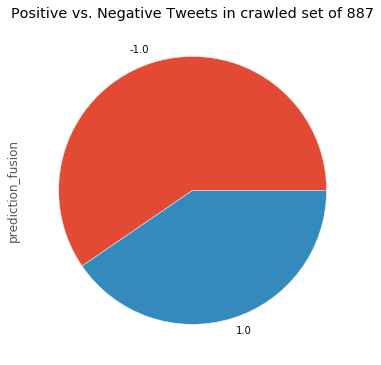

In [38]:
raspi = results_sep_wneutr.prediction_fusion.value_counts()
raspi.plot(kind='pie', title = 'Positive vs. Negative Tweets in crawled set of 887', figsize=[6,6])

In [39]:
raspi

-1.0    527
 1.0    358
Name: prediction_fusion, dtype: int64

In [40]:
results_sep_wneutr.to_excel('fusion_prediction.xlsx')